In [12]:
import rnavigate as rnav
import fragmapper as fm
import matplotlib.pyplot as plt


# TODO list
1. Profiles are based only on two samples, consider simplifying pre-processing.
   FragMaP would then be a subclass of SHAPEMaP, much simpler.
2. Applying Std_err to Modified_rate may not be appropriate.
3. **DONE** Try z-scores based on log(lnz)-log(met) rates.
4. **DONE** Try eliminating outliers from z-score calculation.

## Import data to RNAvigate and run Fragmapper analysis

In [18]:
common_data = rnav.Sample(
    '6HA1 - LSU',
    fasta='./example_data/6HA1_LSU.fasta',
    pdb={'filepath': './example_data/6HA1_LSU.pdb',
         'seq_source': 'fasta',
         'chain': 'A'},
    ss='./example_data/6HA1_LSU.json'
)

# Create RNAvigate sample objects

# Quinaxoline test sample
qn = rnav.Sample(
    'quinoxiline',
    inherit=common_data,
    shapemap='./example_data/2_QN_DMSO_subtracted_LSU_profile.txt'
)

# Linezolid test sample
lnz = rnav.Sample(
    'linezolid',
    inherit=common_data,
    shapemap='./example_data/2_ZLD_DMSO_subtracted_LSU_profile.txt'
)

# Methyl control sample
met = rnav.Sample(
    'methyl',
    inherit=common_data,
    shapemap='./example_data/2_Methyl_DMSO_subtracted_LSU_profile.txt'
)

# Run Fragmapper analysis and saving a FragMaP profile object
# NOTE: Fragmapper requires 1 test sample and 1 control sample
qn_fm = fm.Fragmapper(qn, met)
lnz_fm = fm.Fragmapper(lnz, met)

## View FragMaP scatter plot

### Scatter plot with FragMaP profiles

(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='methyl zscore', ylabel='quinoxiline zscore'>)

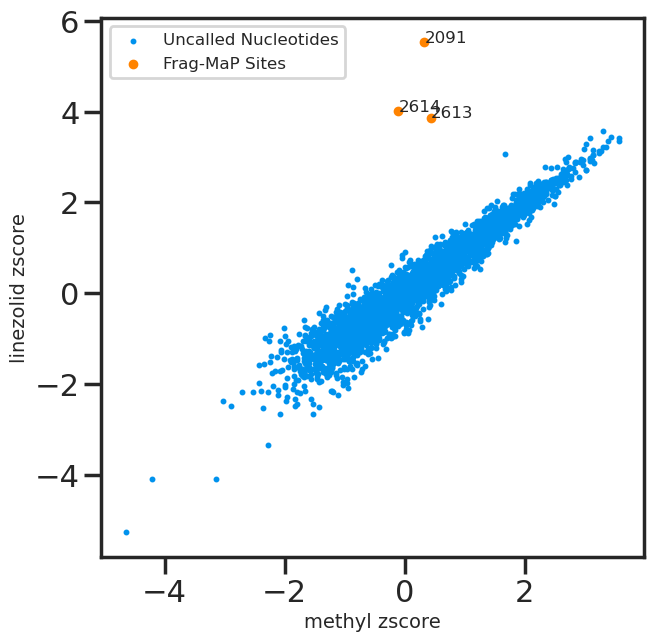

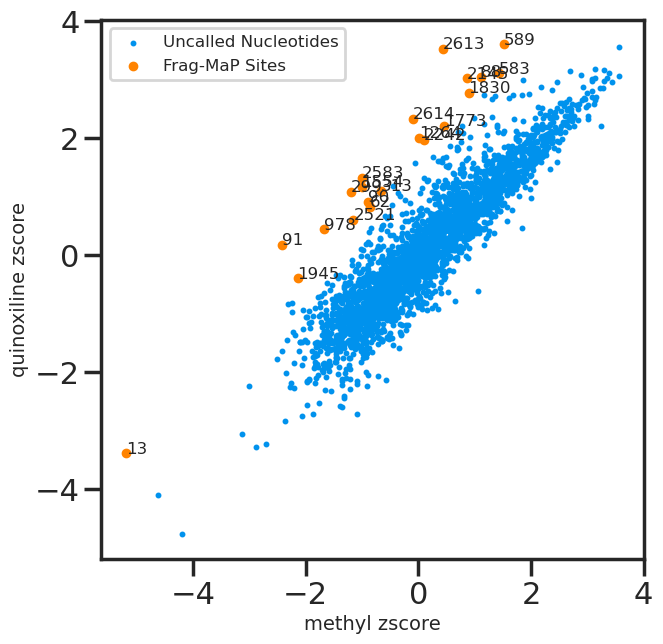

In [19]:
# FragMaP_profile_object.plot_scatter()
lnz_fm.plot_scatter(column='zscore')
qn_fm.plot_scatter(column='zscore')

### Scatter plot with raw mutation rates

(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='methyl Modified_rate', ylabel='quinoxiline Modified_rate'>)

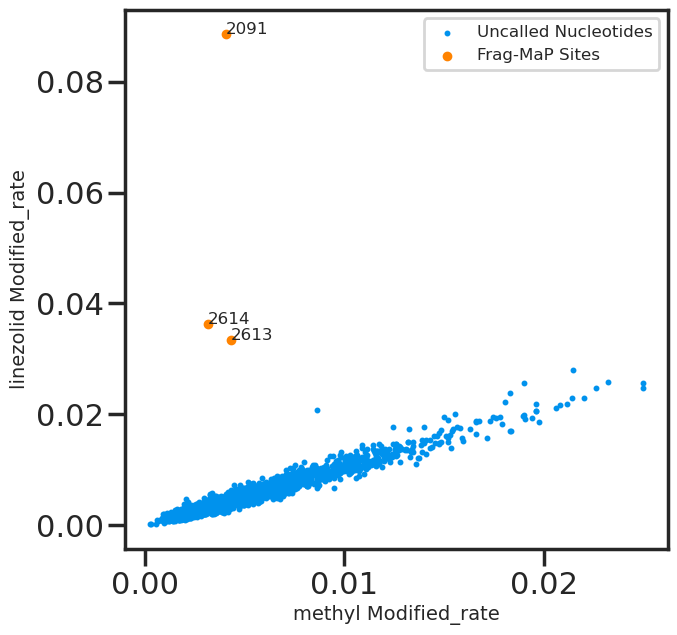

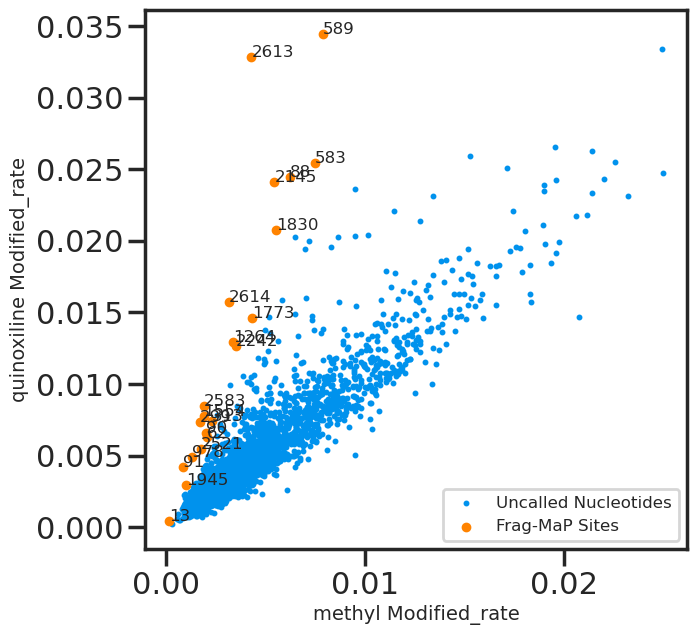

In [20]:
# FragMaP_profile_object.plot_scatter()
lnz_fm.plot_scatter()
qn_fm.plot_scatter()

## View FragMaP profile

Text(0.5, 0, 'Nucleotide position')

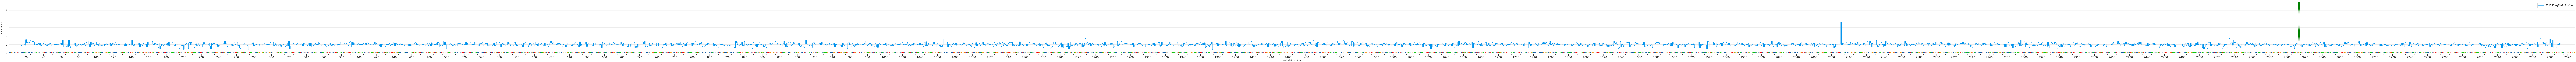

In [21]:
plot = rnav.plot_skyline(samples=[lnz_fm],
                         profile="fragmap",
                         columns=["Fragmap_profile"],
                         seq_source='shapemap',
                         annotations=['fragmap_sites'])
plot.axes[0, 0].set(ylim=[-2, 10])
plot.ax.legend(['ZLD FragMaP Profile'])

plt.ylabel("Mutation rate", size=16)
plt.xlabel("Nucleotide position", size=16)

## View raw sample data

Text(0.5, 0, 'Nucleotide position')

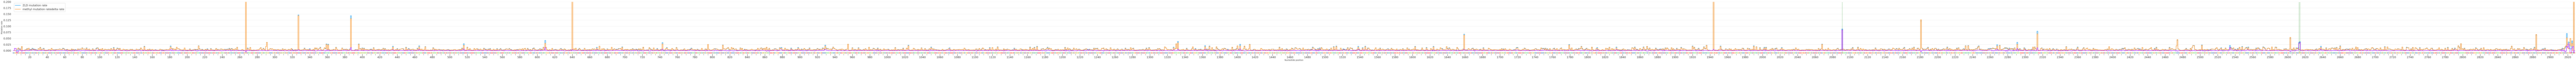

In [22]:
plot = rnav.plot_skyline(samples=[lnz_fm],
                         profile="fragmap",
                         columns=["Modified_rate_1", "Modified_rate_2", "Delta_rate"],
                         seq_source='shapemap',
                         annotations=['fragmap_sites'])
plot.axes[0, 0].set(ylim=[-0.01, 0.2])
plot.ax.legend(["ZLD mutation rate", "methyl mutation rate" "delta rate"])

plt.ylabel("Mutation rate", size=16)
plt.xlabel("Nucleotide position", size=16)

## View FragMaP site annotation in secondary structure

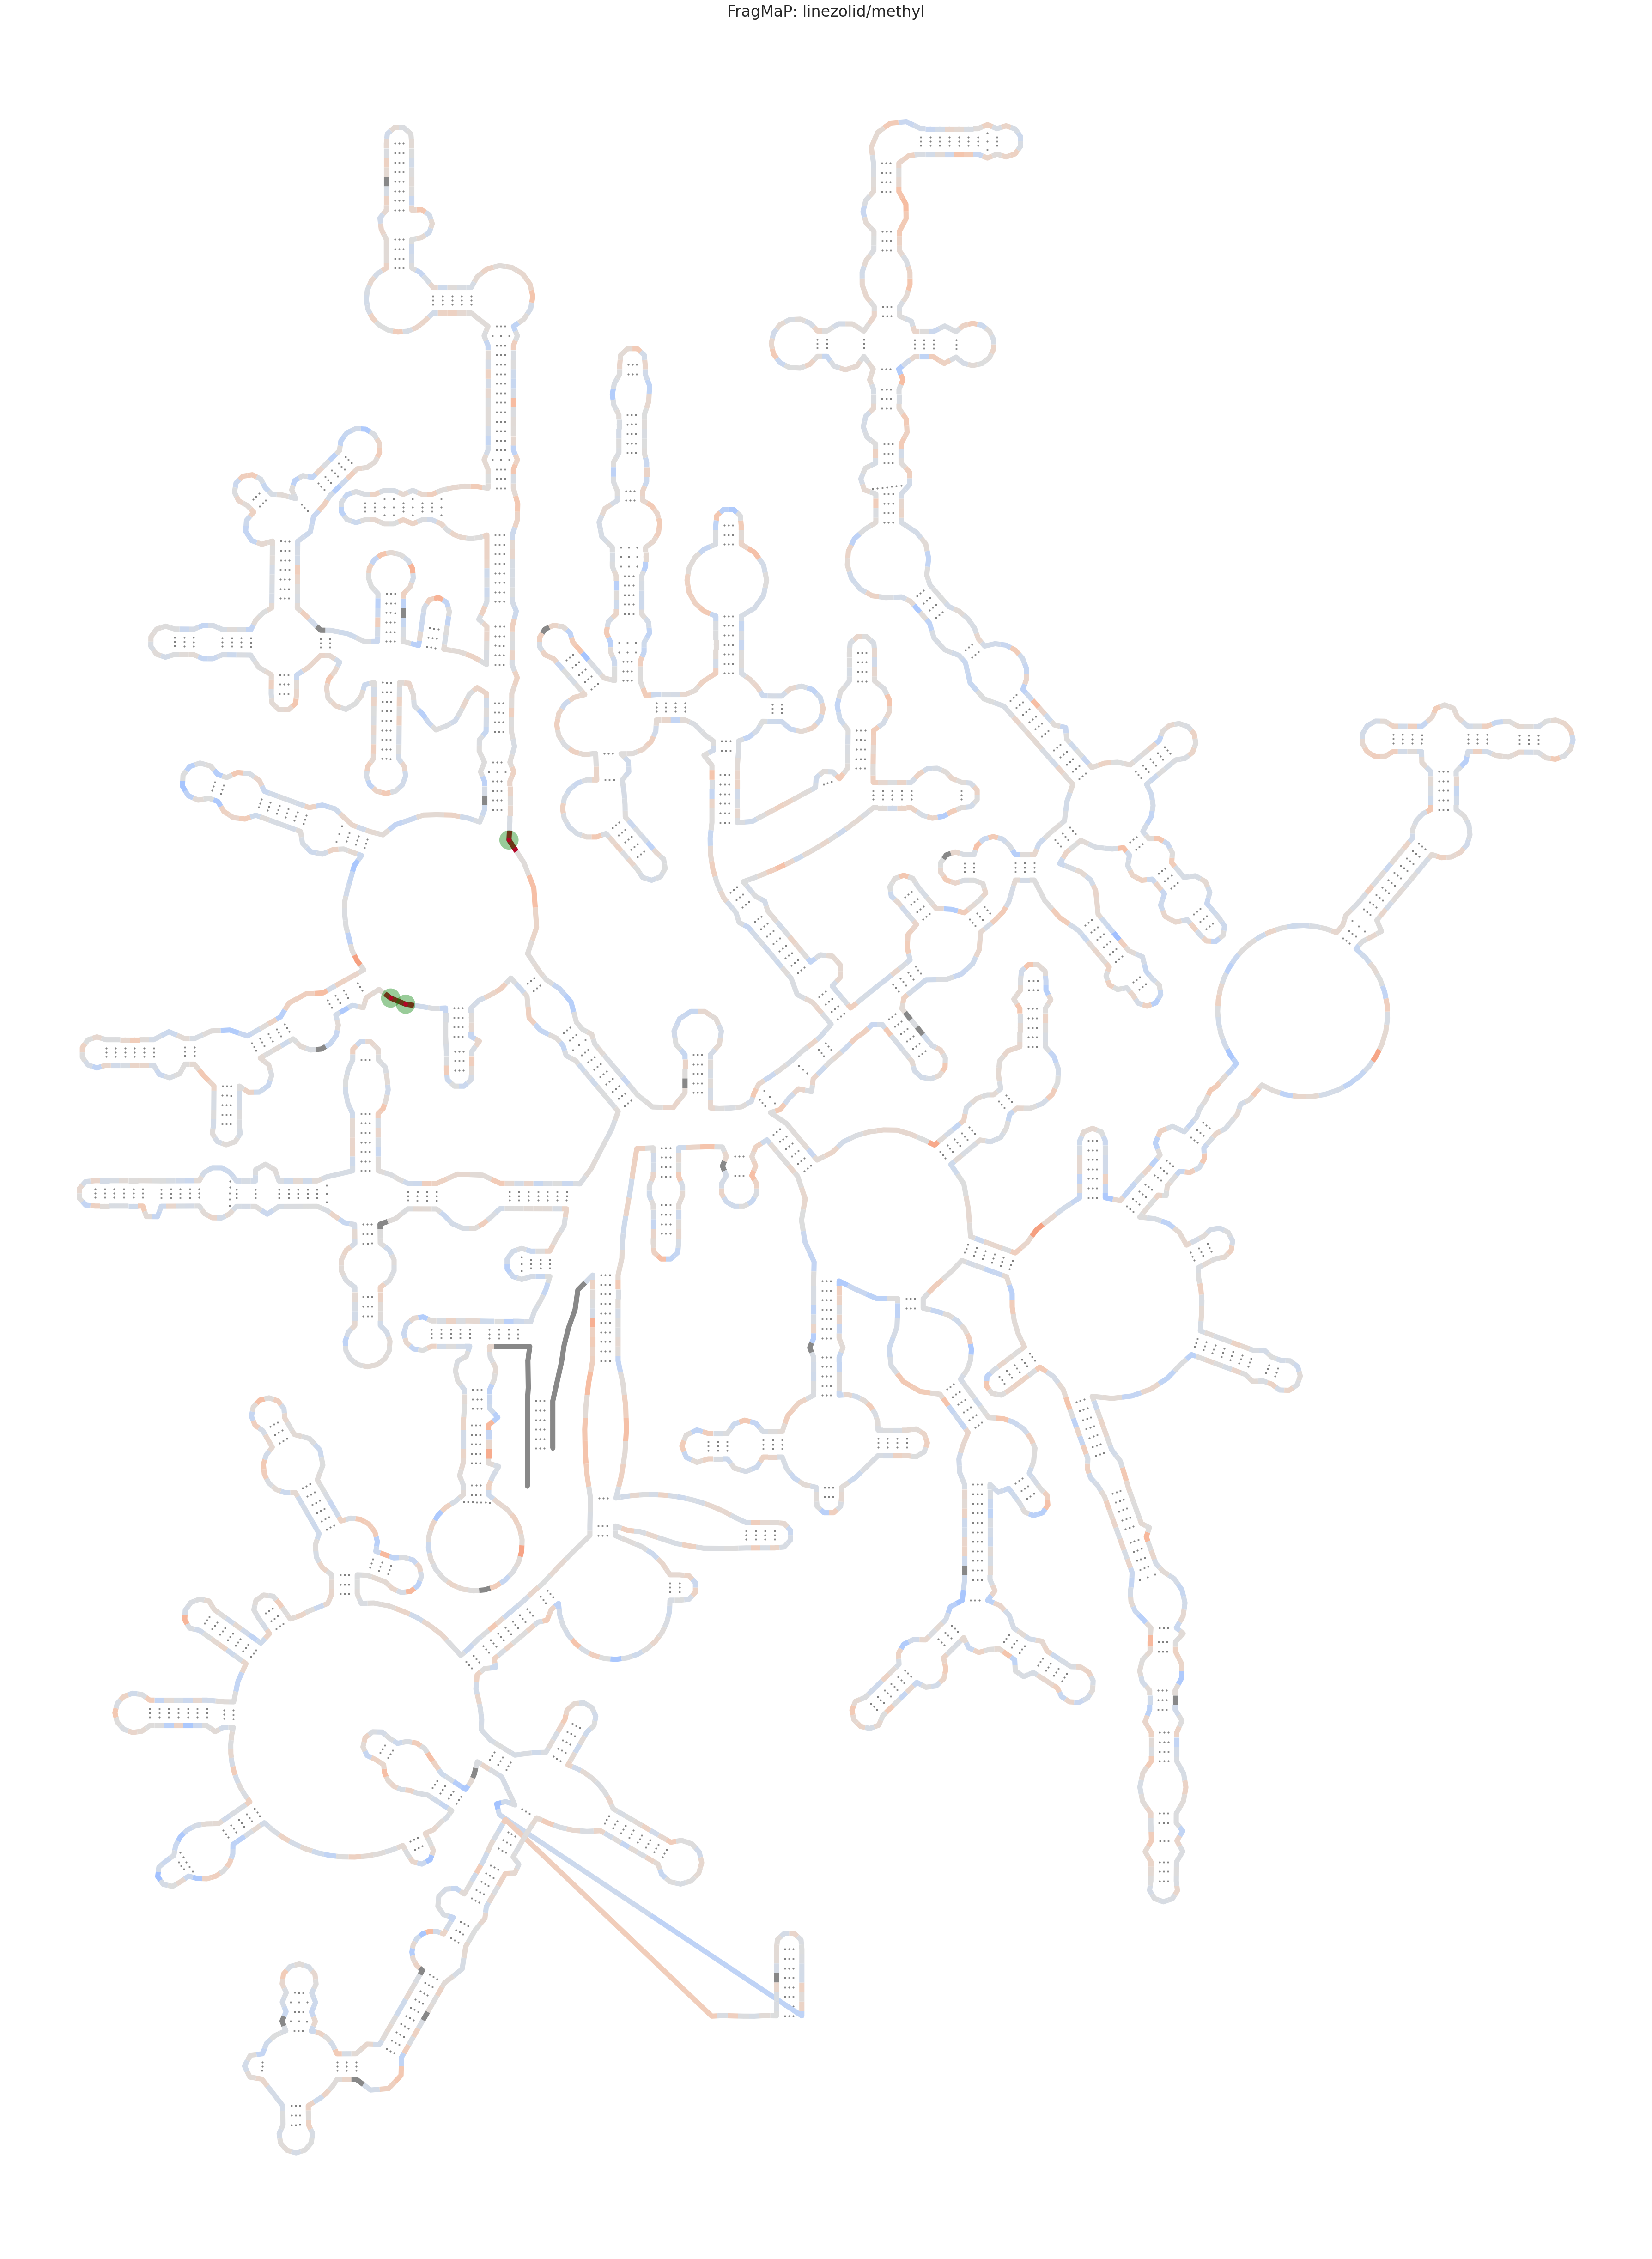

In [8]:
common_data.data['ss'].xcoordinates *= -1
common_data.data['ss'].ycoordinates *= -1
plot = rnav.plot_ss(
    [lnz_fm],
    profile='fragmap',
    colors='profile',
    apply_color_to='structure',
    annotations=['fragmap_sites'],
    plot_kwargs={'structure_lw': 8})